# KMeans Custering

### Import library

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

### Baca data dan tampilkan lima baris pertama

In [2]:
df = pd.read_excel("laporan_iklim_jayapura_mei_2025.xlsx")

In [3]:
df.head()

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,01-05-2025,25.6,32.2,28.8,81,8888.0,5.0,5,70,2,NE
1,02-05-2025,26.4,32.0,28.9,84,0.0,7.8,6,60,3,E
2,03-05-2025,26.3,32.5,28.9,86,0.0,8.0,7,50,4,NE
3,04-05-2025,27.2,32.2,29.1,85,0.1,8.0,6,70,3,NE
4,05-05-2025,26.6,32.2,28.8,87,0.1,6.8,7,40,3,NE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TANGGAL  31 non-null     object 
 1   TN       31 non-null     float64
 2   TX       31 non-null     float64
 3   TAVG     31 non-null     float64
 4   RH_AVG   31 non-null     int64  
 5   RR       31 non-null     float64
 6   SS       31 non-null     float64
 7   FF_X     31 non-null     int64  
 8   DDD_X    31 non-null     int64  
 9   FF_AVG   31 non-null     int64  
 10  DDD_CAR  31 non-null     object 
dtypes: float64(5), int64(4), object(2)
memory usage: 2.8+ KB


### Periksa nilai 8888 dan 9999 disetiap kolom

In [5]:
print("Sebaran nilai 8888 per kolom:")
print((df == 8888).sum())

print("\nSebaran nilai 9999 per kolom:")
print((df == 9999).sum())

Sebaran nilai 8888 per kolom:
TANGGAL    0
TN         0
TX         0
TAVG       0
RH_AVG     0
RR         1
SS         0
FF_X       0
DDD_X      0
FF_AVG     0
DDD_CAR    0
dtype: int64

Sebaran nilai 9999 per kolom:
TANGGAL    0
TN         0
TX         0
TAVG       0
RH_AVG     0
RR         0
SS         0
FF_X       0
DDD_X      0
FF_AVG     0
DDD_CAR    0
dtype: int64


### Penanganan nilai 8888 pada kolom ``RR``

In [6]:
df = df[df['RR'] != 8888]

### Cek kembali

In [7]:
print("Kolom RR dengan nilai 8888 = ", (df['RR'] == 8888).sum())

Kolom RR dengan nilai 8888 =  0


### Pilih Fitur untuk Clustering

In [8]:
fitur = df[['TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X']]

### Standarisasi Fitur

In [9]:
scaler = StandardScaler()
fitur_scaled = scaler.fit_transform(fitur)

### Menentukan Jumlah Cluster (Elbow Method)

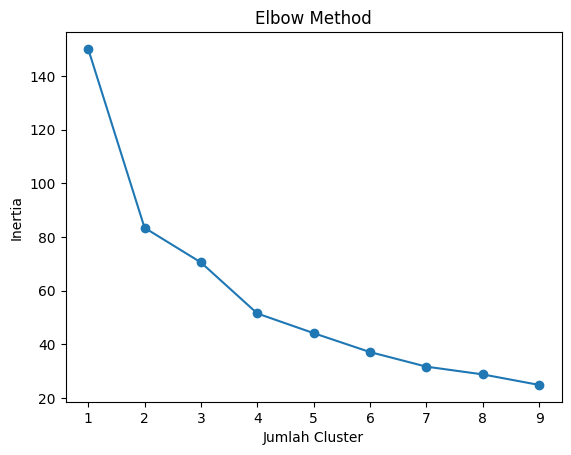

In [10]:
import os

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    os.environ["LOKY_MAX_CPU_COUNT"] = "4"
    kmeans.fit(fitur_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### Validasi jumlah cluster

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Misal kamu sudah punya DataFrame bernama df dan kita pakai kolom numerik saja
# Contoh subset kolom yang dipakai untuk clustering:
X = df[['TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X']]

# Loop untuk uji beberapa jumlah cluster (k)
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    sil_score = silhouette_score(X, cluster_labels)
    db_index = davies_bouldin_score(X, cluster_labels)

    print(f"k={k} → Silhouette Score = {sil_score:.4f}, Davies-Bouldin Index = {db_index:.4f}")

k=2 → Silhouette Score = 0.6990, Davies-Bouldin Index = 0.5096
k=3 → Silhouette Score = 0.4465, Davies-Bouldin Index = 0.9049
k=4 → Silhouette Score = 0.3609, Davies-Bouldin Index = 0.8991
k=5 → Silhouette Score = 0.4205, Davies-Bouldin Index = 0.7640


### Lakukan Clustering

In [12]:
kmeans = KMeans(n_clusters=2, random_state=42) 
df['cluster'] = kmeans.fit_predict(fitur_scaled)

### Lihat Hasilnya

In [13]:
print(df[['TANGGAL', 'cluster']].head())

      TANGGAL  cluster
1  02-05-2025        1
2  03-05-2025        1
3  04-05-2025        1
4  05-05-2025        1
5  06-05-2025        1


### Deskripsi Tiap Cluster

In [14]:
print(df.groupby('cluster')[['TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X']].mean())

              TAVG     RH_AVG        RR        SS      FF_X
cluster                                                    
0        27.654545  89.909091  8.690909  3.000000  4.636364
1        28.910526  85.473684  2.089474  7.147368  6.947368


### Visualisasi

<Axes: xlabel='TAVG', ylabel='RH_AVG'>

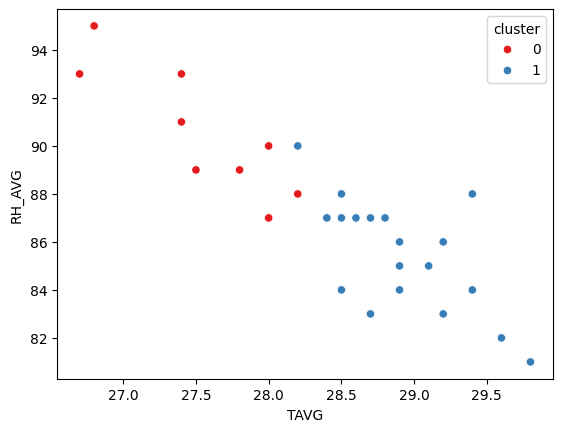

In [15]:
import seaborn as sns

sns.scatterplot(
    x='TAVG', y='RH_AVG', hue='cluster', data=df, palette='Set1'
)

In [16]:
df.shape

(30, 12)

# SIMPANAN

### Contoh 1: Prediksi Suhu Rata-Rata (TAVG) — Regresi

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preprocessing
kolom = ['TN', 'TX', 'RH_AVG', 'RR', 'SS', 'FF_X', 'FF_AVG']
for k in kolom:
    df[k] = df[k].astype(str).str.replace(',', '.').astype(float)

# Fitur & target
X = df[kolom]
y = df['TAVG']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi
prediksi = model.predict(X_test)
mse = mean_squared_error(y_test, prediksi)
print(f"Mean Squared Error: {mse:.2f}")


### Contoh 2: Prediksi Hujan atau Tidak — Klasifikasi

In [ ]:
# Label klasifikasi: apakah hujan
df['Hujan'] = df['RR'].apply(lambda x: 1 if float(x) > 0 else 0)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[kolom]
y = df['Hujan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


### Bisa Digabung dengan Data Hari Sebelumnya

In [ ]:
df['TAVG_besok'] = df['TAVG'].shift(-1)
df.dropna(inplace=True)


In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test.values, label='Actual')
plt.plot(prediksi, label='Predicted')
plt.legend()
plt.title("Prediksi vs Aktual (TAVG)")
plt.show()


In [17]:
df.shape

(30, 12)

In [18]:
ls

 Volume in drive C has no label.
 Volume Serial Number is D429-F2CA

 Directory of C:\Users\agnes\Desktop\2025\s6\bda\m11

06/06/2025  17.27    <DIR>          .
06/06/2025  17.16    <DIR>          ..
06/06/2025  09.47    <DIR>          .ipynb_checkpoints
05/06/2025  18.37            96.370 DataBaru2.csv
06/06/2025  10.31            19.655 Dataset.ipynb
06/06/2025  17.27            74.275 KMeans.ipynb
06/06/2025  09.59            10.531 laporan_iklim_April-sleman.xlsx
06/06/2025  11.13            23.493 laporan_iklim_jayapura_mei_2025.pdf
06/06/2025  12.19            10.589 laporan_iklim_jayapura_mei_2025.xlsx
06/06/2025  09.25             9.080 laporan_iklim_Juni-sleman.xlsx
06/06/2025  09.23            10.638 laporan_iklim_Maret-sleman.xlsx
06/06/2025  09.24            10.613 laporan_iklim_Mei-sleman.xlsx
06/06/2025  09.48            84.457 Screenshot 2025-06-06 094823.png
05/06/2025  20.30         1.021.661 Tugas02_215410072_Fransiskus A Tekege.pdf
              11 File(s)      1.371